95% Prediction Intervals (Lognormal):

Bearish (-10%) - June: $61.37 to $140.96
Bearish (-10%) - December: $48.05 to $155.74
Neutral (Risk-Free ~5%) - June: $66.15 to $151.93
Neutral (Risk-Free ~5%) - December: $55.82 to $180.94
Bullish (+35%) - June: $76.85 to $176.52
Bullish (+35%) - December: $75.35 to $244.24


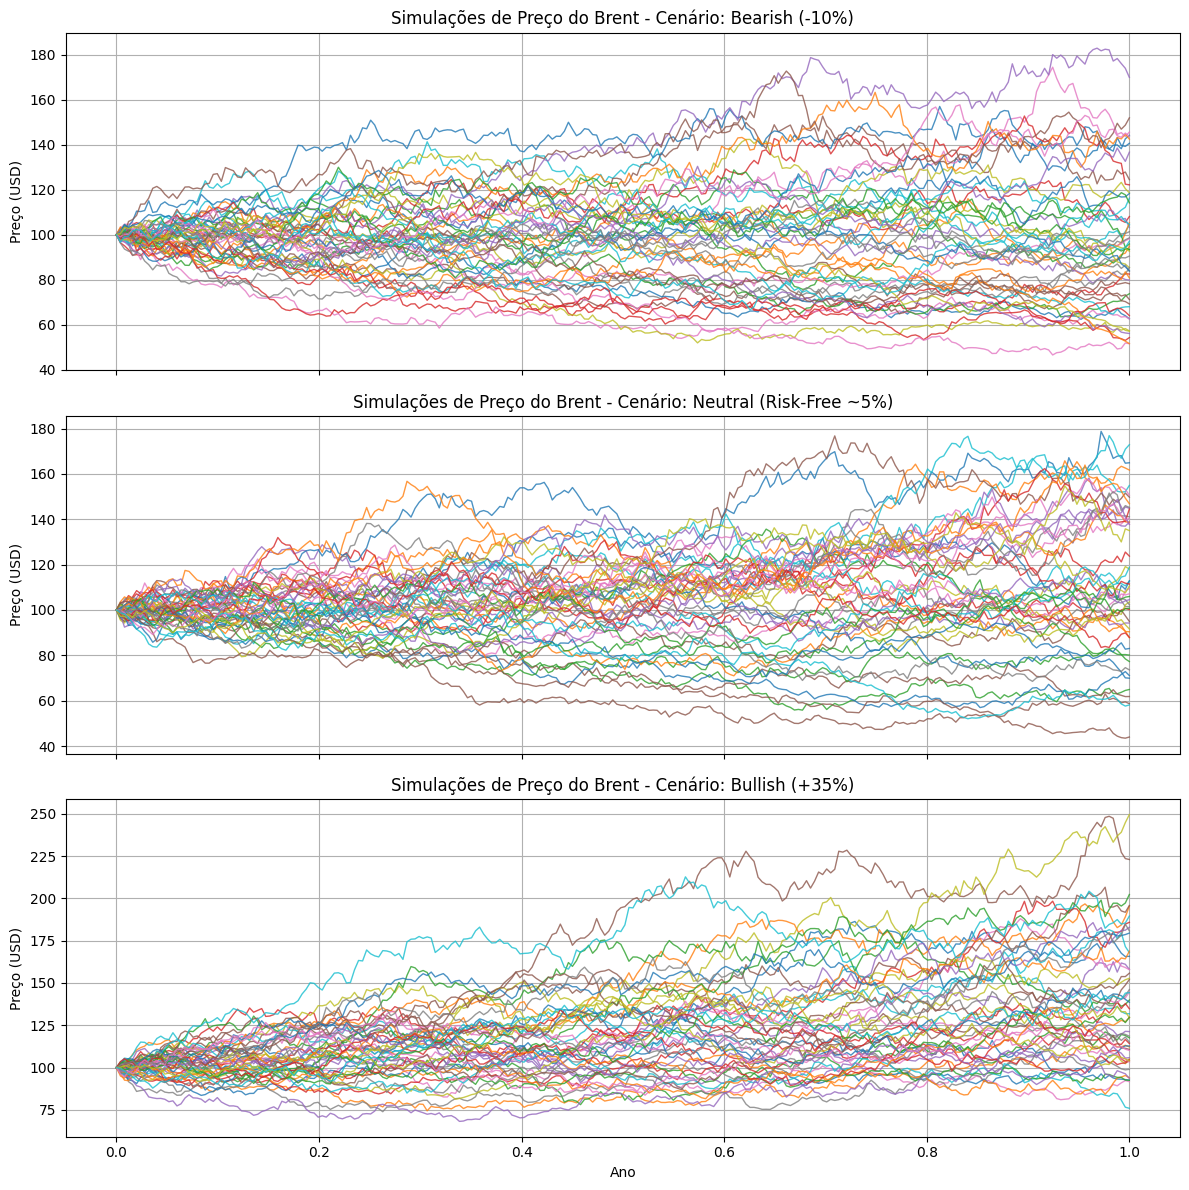

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Configurações
S0 = 100               # Preço inicial
sigma = 0.30           # Volatilidade anual de 30%
T1 = 0.5               # Junho (~meio ano)
T2 = 1.0               # Dezembro (fim do ano)
confidence = 0.95
z_score = stats.norm.ppf(1 - (1 - confidence) / 2)

# Três cenários: drift anual
drifts = {
    "Bearish (-10%)": -0.10,
    "Neutral (Risk-Free ~5%)": 0.05,
    "Bullish (+35%)": 0.35
}

# Função para calcular intervalo de previsão lognormal
def prediction_interval(S0, mu, sigma, T, z):
    mean = (mu - 0.5 * sigma**2) * T
    std = sigma * np.sqrt(T)
    lower = S0 * np.exp(mean - z * std)
    upper = S0 * np.exp(mean + z * std)
    return lower, upper

# Mostrar intervalos
print("95% Prediction Intervals (Lognormal):\n")
for name, mu in drifts.items():
    for T, label in zip([T1, T2], ["June", "December"]):
        low, high = prediction_interval(S0, mu, sigma, T, z_score)
        print(f"{name} - {label}: ${low:.2f} to ${high:.2f}")

# Simulação para gráfico
np.random.seed(42)
N = 1000
t = np.linspace(0, 1, 252)
dt = t[1] - t[0]
simulations = {}
N_sim = 50

for name, mu in drifts.items():
    prices = np.zeros((N, len(t)))
    prices[:, 0] = S0
    for i in range(1, len(t)):
        Z = np.random.normal(0, 1, N)
        prices[:, i] = prices[:, i-1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z)
    simulations[name] = prices

# Plotagem individual por cenário
fig, axs = plt.subplots(3, 1, figsize=(12, 12), sharex=True)

for ax, (name, data) in zip(axs, simulations.items()):
    for i in range(N_sim):
        ax.plot(t, data[i], lw=1, alpha=0.8)
    ax.set_title(f"Simulações de Preço do Brent - Cenário: {name}")
    ax.set_ylabel("Preço (USD)")
    ax.grid(True)

axs[-1].set_xlabel("Ano")
plt.tight_layout()
plt.show()
